In [3]:
import requests 
import pandas as pd
import json
from datetime import date

In [4]:
# create request header
headers = {'User-Agent': "kasia.dziakowska@gmail.com"}
headers

{'User-Agent': 'kasia.dziakowska@gmail.com'}

In [5]:
# get all companies data
companyTickers = requests.get(
    "https://www.sec.gov/files/company_tickers.json",
    headers=headers
    )

In [175]:
companyTickers.json().keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [25]:
companyData = pd.DataFrame.from_dict(companyTickers.json(),
                                     orient='index')
companyData

,cik_str,ticker,title
0,320193,AAPL,Apple Inc.
1,789019,MSFT,MICROSOFT CORP
2,1652044,GOOGL,Alphabet Inc.
3,1018724,AMZN,AMAZON COM INC
4,1045810,NVDA,NVIDIA CORP
...,...,...,...
10691,19617,JPM-PM,JPMORGAN CHASE & CO
10692,19617,AMJ,JPMORGAN CHASE & CO
10693,1845123,IVCPU,Swiftmerge Acquisition Corp.
10694,1845123,IVCPW,Swiftmerge Acquisition Corp.


In [174]:
company_data_cik = companyData[companyData['cik_str'] == cik]

In [27]:
companyData['cik_str'] = companyData['cik_str'].astype(
                           str).str.zfill(10)

In [180]:
cik = companyData[0:1].cik_str[0]
cik

'0000320193'

In [32]:
# get company specific filing metadata
filingMetadata = requests.get(
    f'https://data.sec.gov/submissions/CIK{cik}.json',
    headers=headers
    )

In [87]:
filingMetadata.json().keys()

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])

In [33]:
filingMetadata.json()

{'cik': '320193',
 'entityType': 'operating',
 'sic': '3571',
 'sicDescription': 'Electronic Computers',
 'insiderTransactionForOwnerExists': 0,
 'insiderTransactionForIssuerExists': 1,
 'name': 'Apple Inc.',
 'tickers': ['AAPL'],
 'exchanges': ['Nasdaq'],
 'ein': '942404110',
 'description': '',
 'website': '',
 'investorWebsite': '',
 'category': 'Large accelerated filer',
 'fiscalYearEnd': '0928',
 'stateOfIncorporation': 'CA',
 'stateOfIncorporationDescription': 'CA',
 'addresses': {'mailing': {'street1': 'ONE APPLE PARK WAY',
   'street2': None,
   'city': 'CUPERTINO',
   'stateOrCountry': 'CA',
   'zipCode': '95014',
   'stateOrCountryDescription': 'CA'},
  'business': {'street1': 'ONE APPLE PARK WAY',
   'street2': None,
   'city': 'CUPERTINO',
   'stateOrCountry': 'CA',
   'zipCode': '95014',
   'stateOrCountryDescription': 'CA'}},
 'phone': '(408) 996-1010',
 'flags': '',
 'formerNames': [{'name': 'APPLE INC',
   'from': '2007-01-10T00:00:00.000Z',
   'to': '2019-08-05T00:00:0

In [176]:
allForms = pd.DataFrame.from_dict(
             filingMetadata.json()['filings']['recent']
             )
allForms.head()

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
0,0000320193-23-000113,2023-12-01,2023-11-29,2023-12-01T18:32:18.000Z,,4,,,,4600,0,0,xslF345X05/wk-form4_1701473530.xml,FORM 4
1,0000320193-23-000111,2023-11-20,2023-11-16,2023-11-20T18:31:21.000Z,,4,,,,8165,0,0,xslF345X05/wk-form4_1700523067.xml,FORM 4
2,0000320193-23-000109,2023-11-14,2023-11-10,2023-11-14T18:31:09.000Z,,4,,,,5066,0,0,xslF345X05/wk-form4_1700004649.xml,FORM 4
3,0000320193-23-000106,2023-11-03,2023-09-30,2023-11-02T18:08:27.000Z,34,10-K,001-36743,231373899,,9569569,1,1,aapl-20230930.htm,10-K
4,0000320193-23-000104,2023-11-02,2023-11-02,2023-11-02T16:30:32.000Z,34,8-K,001-36743,231372885,"2.02,9.01",450675,1,1,aapl-20231102.htm,8-K


In [172]:

#function returning df with filings based on CIK, form type and year. Above df is name of the company, CIK and link to filing


def get_data_forms (cik, form_type, year):
    
    filingMetadata = requests.get(
    f'https://data.sec.gov/submissions/CIK{cik}.json',
    headers=headers
    )
    company_data_cik = companyData[companyData['cik_str'] == cik]
    name = company_data_cik.title.item()
    ticker = company_data_cik.ticker.item()
    allForms = pd.DataFrame.from_dict(
             filingMetadata.json()['filings']['recent']
             )
    allForms = allForms[['accessionNumber', 'reportDate', 'form', 'primaryDocument']]
    
    #find selected form
    allForms = allForms[allForms.form == form_type]
    
    #find selected year
    allForms = allForms[allForms.reportDate.str.contains(year)]
    
    document = allForms['primaryDocument']
    document = document.item()
    
    acc_num_no_dash = allForms['accessionNumber'].str.replace('-','', regex=True)
    acc_num_no_dash = acc_num_no_dash.item()
    
    allForms = allForms.reset_index(drop=True)
    

    URL_FILING = (
    f"https://www.sec.gov/Archives/edgar/data/{cik}/{acc_num_no_dash}/{document}")
    
    print('Company Name:', name)
    print('CIK number:', cik)
    print('Link to the form:', URL_FILING)
    
    return  allForms


In [173]:
#example of search of report based on CIK number, type of form and year

get_data_forms('0000320193', '10-K', '2023')

Company Name: Apple Inc.
CIK number: 0000320193
Link to the form: https://www.sec.gov/Archives/edgar/data/0000320193/000032019323000106/aapl-20230930.htm


,accessionNumber,reportDate,form,primaryDocument
0,0000320193-23-000106,2023-09-30,10-K,aapl-20230930.htm


In [60]:
# get company facts data
companyFacts = requests.get(
    f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json',
    headers=headers
    )

In [61]:
companyFacts.json().keys()

dict_keys(['cik', 'entityName', 'facts'])

In [181]:
companyFacts.json()['facts'].keys()

dict_keys(['dei', 'us-gaap'])

In [185]:
companyFacts.json()['facts']['dei']['EntityCommonStockSharesOutstanding'].keys()

dict_keys(['label', 'description', 'units'])

In [275]:
companyFacts.json()['facts']['dei']['EntityCommonStockSharesOutstanding']['units']['shares']

[{'end': '2009-06-27',
  'val': 895816758,
  'accn': '0001193125-09-153165',
  'fy': 2009,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2009-07-22',
  'frame': 'CY2009Q2I'},
 {'end': '2009-10-16',
  'val': 900678473,
  'accn': '0001193125-09-214859',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2009-10-27'},
 {'end': '2009-10-16',
  'val': 900678473,
  'accn': '0001193125-10-012091',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K/A',
  'filed': '2010-01-25',
  'frame': 'CY2009Q3I'},
 {'end': '2010-01-15',
  'val': 906794589,
  'accn': '0001193125-10-012085',
  'fy': 2010,
  'fp': 'Q1',
  'form': '10-Q',
  'filed': '2010-01-25',
  'frame': 'CY2009Q4I'},
 {'end': '2010-04-09',
  'val': 909938383,
  'accn': '0001193125-10-088957',
  'fy': 2010,
  'fp': 'Q2',
  'form': '10-Q',
  'filed': '2010-04-21',
  'frame': 'CY2010Q1I'},
 {'end': '2010-07-09',
  'val': 913562880,
  'accn': '0001193125-10-162840',
  'fy': 2010,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2010-07-21',
  'frame'

In [279]:
CompanyFacts_EntityCommonStock = pd.DataFrame.from_dict(companyFacts.json()['facts']['dei']\
                                                        ['EntityCommonStockSharesOutstanding']['units']['shares'])
CompanyFacts_EntityCommonStock.head()

,end,val,accn,fy,fp,form,filed,frame
0,2009-06-27,895816758,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,CY2009Q2I
1,2009-10-16,900678473,0001193125-09-214859,2009,FY,10-K,2009-10-27,NaN
2,2009-10-16,900678473,0001193125-10-012091,2009,FY,10-K/A,2010-01-25,CY2009Q3I
3,2010-01-15,906794589,0001193125-10-012085,2010,Q1,10-Q,2010-01-25,CY2009Q4I
4,2010-04-09,909938383,0001193125-10-088957,2010,Q2,10-Q,2010-04-21,CY2010Q1I


In [280]:
def EntityCommonStock(cik, year, Qu):
    companyFacts = requests.get(f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json',headers=headers)
    df = pd.DataFrame.from_dict(companyFacts.json()['facts']['dei']['EntityCommonStockSharesOutstanding']['units']['shares'])
    
    if (year == 'all') and (Qu == 'all'):
        df = pd.DataFrame.from_dict(companyFacts.json()['facts']['us-gaap']['Assets']['units']['USD'])

    else:
        df = df[df['fy'] == year]
       
        if Qu == 'all':
            df
        
        else: 
            df = df[df['fp'] == Qu]
    
    
    return df

In [283]:
EntityCommonStock('0000320193', 2010, 'all')

,end,val,accn,fy,fp,form,filed,frame
3,2010-01-15,906794589,0001193125-10-012085,2010,Q1,10-Q,2010-01-25,CY2009Q4I
4,2010-04-09,909938383,0001193125-10-088957,2010,Q2,10-Q,2010-04-21,CY2010Q1I
5,2010-07-09,913562880,0001193125-10-162840,2010,Q3,10-Q,2010-07-21,CY2010Q2I
6,2010-10-15,917307099,0001193125-10-238044,2010,FY,10-K,2010-10-27,CY2010Q3I


In [255]:

def CompanyFacts_Asstes(cik, year, Qu):
    companyFacts = requests.get(f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json',headers=headers)
    df = pd.DataFrame.from_dict(companyFacts.json()['facts']['us-gaap']['Assets']['units']['USD'])
    
    if (year == 'all') and (Qu == 'all'):
        df = pd.DataFrame.from_dict(companyFacts.json()['facts']['us-gaap']['Assets']['units']['USD'])

    else:
        df = df[df['fy'] == year]
       
        if Qu == 'all':
            df
        
        else: 
            df = df[df['fp'] == Qu]
    
    
    return df

In [256]:
CompanyFacts_Asstes('0000320193', 2023, 'Q1' )

,end,val,accn,fy,fp,form,filed,frame
116,2022-09-24,352755000000,0000320193-23-000006,2023,Q1,10-Q,2023-02-03,NaN
120,2022-12-31,346747000000,0000320193-23-000006,2023,Q1,10-Q,2023-02-03,CY2022Q4I


In [261]:
Assets2021 = CompanyFacts_Asstes('0000320193', 2021, 'all')
Assets2021

,end,val,accn,fy,fp,form,filed,frame
100,2020-09-26,323888000000,0000320193-21-000010,2021,Q1,10-Q,2021-01-28,NaN
101,2020-09-26,323888000000,0000320193-21-000056,2021,Q2,10-Q,2021-04-29,NaN
102,2020-09-26,323888000000,0000320193-21-000065,2021,Q3,10-Q,2021-07-28,NaN
103,2020-09-26,323888000000,0000320193-21-000105,2021,FY,10-K,2021-10-29,CY2020Q3I
104,2020-12-26,354054000000,0000320193-21-000010,2021,Q1,10-Q,2021-01-28,CY2020Q4I
105,2021-03-27,337158000000,0000320193-21-000056,2021,Q2,10-Q,2021-04-29,CY2021Q1I
106,2021-06-26,329840000000,0000320193-21-000065,2021,Q3,10-Q,2021-07-28,CY2021Q2I
107,2021-09-25,351002000000,0000320193-21-000105,2021,FY,10-K,2021-10-29,NaN


In [260]:
CompanyFacts_Asstes('0000320193', 'all', 'all' )

,end,val,accn,fy,fp,form,filed,frame
0,2008-09-27,39572000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,NaN
1,2008-09-27,39572000000,0001193125-09-214859,2009,FY,10-K,2009-10-27,NaN
2,2008-09-27,36171000000,0001193125-10-012091,2009,FY,10-K/A,2010-01-25,NaN
3,2008-09-27,36171000000,0001193125-10-238044,2010,FY,10-K,2010-10-27,CY2008Q3I
4,2009-06-27,48140000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,CY2009Q2I
...,...,...,...,...,...,...,...,...
119,2022-09-24,352755000000,0000320193-23-000106,2023,FY,10-K,2023-11-03,CY2022Q3I
120,2022-12-31,346747000000,0000320193-23-000006,2023,Q1,10-Q,2023-02-03,CY2022Q4I
121,2023-04-01,332160000000,0000320193-23-000064,2023,Q2,10-Q,2023-05-05,CY2023Q1I
122,2023-07-01,335038000000,0000320193-23-000077,2023,Q3,10-Q,2023-08-04,CY2023Q2I


<Axes: xlabel='end'>

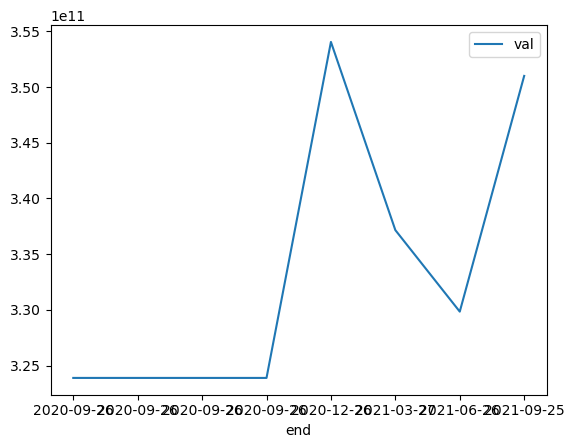

In [263]:
Assets2021.plot(x = 'end', y='val')

In [274]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/Assets.json'
    ),
    headers=headers
    )

In [268]:
# review data
companyConcept.json().keys()

dict_keys(['cik', 'taxonomy', 'tag', 'label', 'description', 'entityName', 'units'])

In [271]:
# parse assets from single filing
companyConcept.json()['units']['USD'][0]['val']

39572000000

In [272]:
# get all filings data 
assetsData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))
assetsData

,end,val,accn,fy,fp,form,filed,frame
0,2008-09-27,39572000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,NaN
1,2008-09-27,39572000000,0001193125-09-214859,2009,FY,10-K,2009-10-27,NaN
2,2008-09-27,36171000000,0001193125-10-012091,2009,FY,10-K/A,2010-01-25,NaN
3,2008-09-27,36171000000,0001193125-10-238044,2010,FY,10-K,2010-10-27,CY2008Q3I
4,2009-06-27,48140000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,CY2009Q2I
...,...,...,...,...,...,...,...,...
119,2022-09-24,352755000000,0000320193-23-000106,2023,FY,10-K,2023-11-03,CY2022Q3I
120,2022-12-31,346747000000,0000320193-23-000006,2023,Q1,10-Q,2023-02-03,CY2022Q4I
121,2023-04-01,332160000000,0000320193-23-000064,2023,Q2,10-Q,2023-05-05,CY2023Q1I
122,2023-07-01,335038000000,0000320193-23-000077,2023,Q3,10-Q,2023-08-04,CY2023Q2I


In [273]:
# get assets from 10Q forms and reset index
assets10Q = assetsData[assetsData.form == '10-Q']

In [137]:
assets10Q = assets10Q.reset_index(drop=True)
assets10Q

,end,val,accn,fy,fp,form,filed,frame
0,2008-09-27,39572000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,NaN
1,2009-06-27,48140000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,CY2009Q2I
2,2009-09-26,47501000000,0001193125-10-012085,2010,Q1,10-Q,2010-01-25,NaN
3,2009-09-26,47501000000,0001193125-10-088957,2010,Q2,10-Q,2010-04-21,NaN
4,2009-09-26,47501000000,0001193125-10-162840,2010,Q3,10-Q,2010-07-21,NaN
...,...,...,...,...,...,...,...,...
81,2022-09-24,352755000000,0000320193-23-000064,2023,Q2,10-Q,2023-05-05,NaN
82,2022-09-24,352755000000,0000320193-23-000077,2023,Q3,10-Q,2023-08-04,NaN
83,2022-12-31,346747000000,0000320193-23-000006,2023,Q1,10-Q,2023-02-03,CY2022Q4I
84,2023-04-01,332160000000,0000320193-23-000064,2023,Q2,10-Q,2023-05-05,CY2023Q1I


<Axes: xlabel='end'>

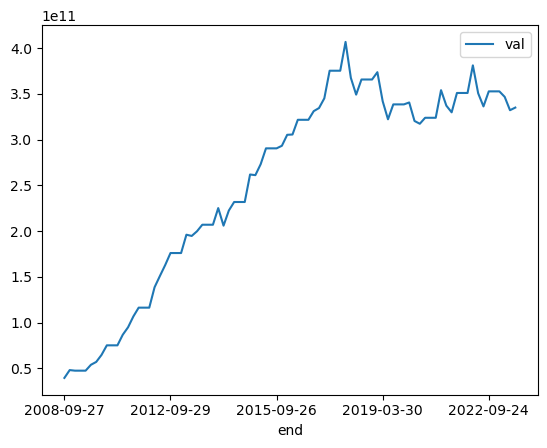

In [138]:
# plot 
assets10Q.plot(x='end', y='val')